In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
dataframe = pd.read_csv("C:/Users/dhruv/Downloads/data analysis projects/CC DA IT/1 Zomato Data Analysis Using Python/Zomato-data-.csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [3]:
#Converting the data type of the “rate” column to float and remove the denominator
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
#Summary
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [5]:
# Display basic statistics of the dataframe
print(dataframe.describe())

# Check for missing values in the dataframe
print(dataframe.isnull().sum())

             rate        votes  approx_cost(for two people)
count  148.000000   148.000000                   148.000000
mean     3.633108   264.810811                   418.243243
std      0.402271   653.676951                   223.085098
min      2.600000     0.000000                   100.000000
25%      3.300000     6.750000                   200.000000
50%      3.700000    43.500000                   400.000000
75%      3.900000   221.750000                   600.000000
max      4.600000  4884.000000                   950.000000
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64


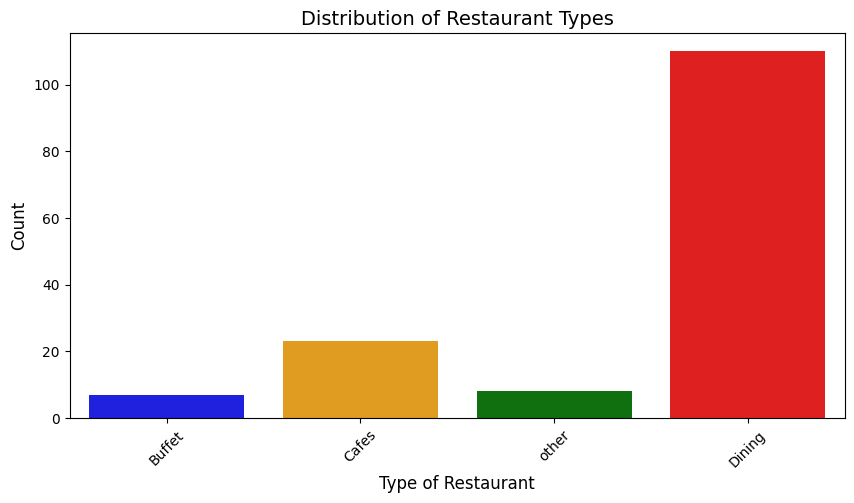

In [19]:
#Let’s explore the listed_in (type) colum
print(dataframe['listed_in(type)'].value_counts())
# Define a custom color palette
custom_palette = ["blue", "orange", "green", "red"]

plt.figure(figsize=(10, 5))  # Adjust figure size
sns.countplot(
    data=dataframe, 
    x="listed_in(type)", 
    hue="listed_in(type)",  # Assign x variable to hue
    palette=custom_palette,  # Apply custom colors
    legend=False  # Remove redundant legend
)
plt.xlabel("Type of Restaurant", fontsize=12)  # Proper x-axis label
plt.ylabel("Count", fontsize=12)  # Proper y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.title("Distribution of Restaurant Types", fontsize=14)  # Add title
plt.show()


Conclusion: The majority of the restaurants fall into the dining category.



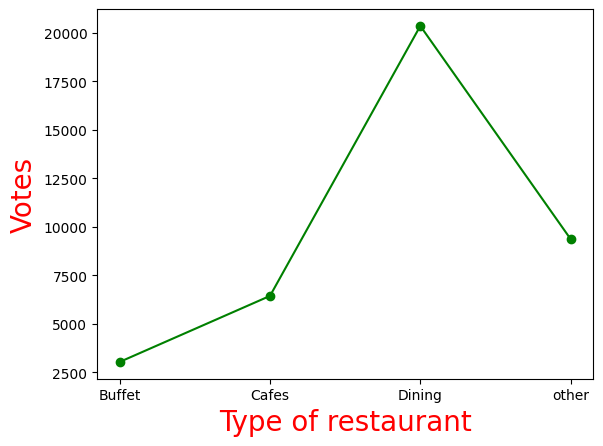

In [23]:
# Grouping the data by the “listed_in(type)” column and summing the “votes” column
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
# Creating a dataframe from the grouped data
result = pd.DataFrame({'votes': grouped_data})

# Plotting the data
plt.plot(result, c='green', marker='o')

# Set labels with size and color
plt.xlabel('Type of restaurant', color='red', fontsize=20)
plt.ylabel('Votes', color='red', fontsize=20)

# Displaying the labels, including the unwanted text (which should appear by default)
plt.show()


Conclusion: Dining restaurants are preferred by a larger number of individuals.

In [24]:
#Now we will determine the restaurant’s name that received the maximum votes based on a given dataframe.
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


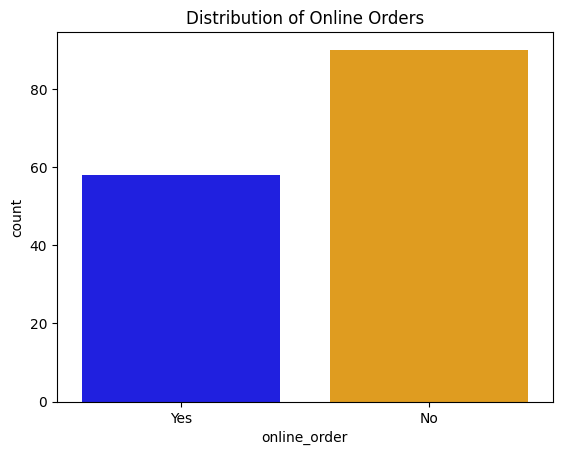

In [28]:
#now Let’s explore the online_order column.
# Plotting the distribution of online orders with custom colors and avoiding deprecation warning
sns.countplot(data=dataframe, x='online_order', hue='online_order', palette={'No': 'orange', 'Yes': 'blue'}, legend=False)

# Adding title
plt.title('Distribution of Online Orders')

# Display the plot
plt.show()

Conclusion: This suggests that a majority of the restaurants do not accept online orders.

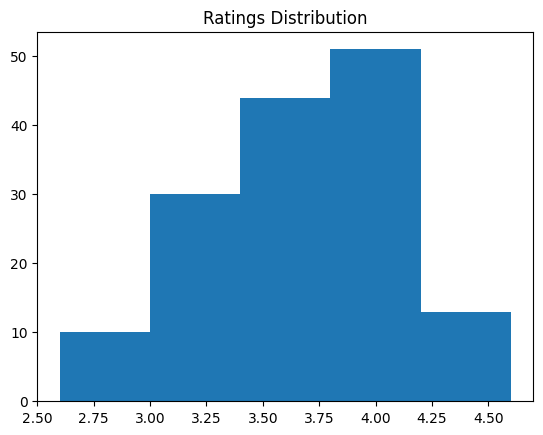

In [29]:
#Let’s explore the rate column.
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()


Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.



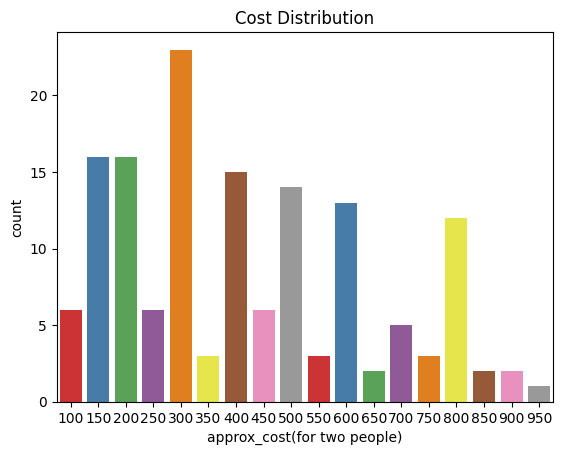

In [32]:
#Let’s explore the approx_cost(for two people) column.
# Extracting the approximate cost for two people
couple_data = dataframe['approx_cost(for two people)']

# Plotting the distribution with different colors for each bar
sns.countplot(data=dataframe, x='approx_cost(for two people)', hue='approx_cost(for two people)', palette='Set1', legend=False)

# Adding title
plt.title('Cost Distribution')

# Display the plot
plt.show()

onclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.

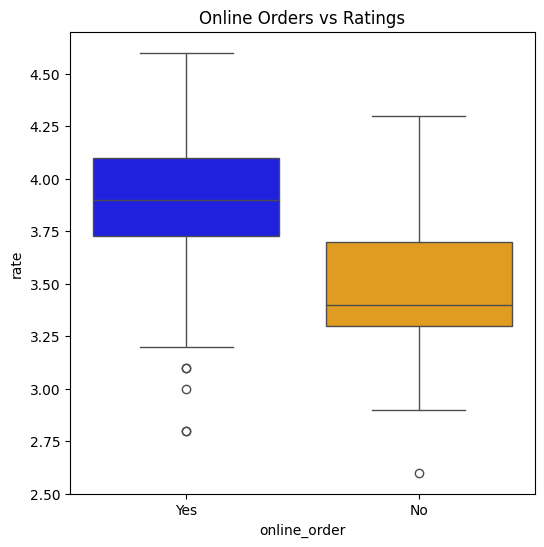

In [35]:
#Now we will examine whether online orders receive higher ratings than offline orders.
# Set the figure size
plt.figure(figsize=(6, 6))

# Plotting the boxplot with custom colors
sns.boxplot(data=dataframe, x='online_order', y='rate', hue='online_order', palette={'No': 'orange', 'Yes': 'blue'}, legend=False)

# Adding title
plt.title('Online Orders vs Ratings')

# Display the plot
plt.show()

CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

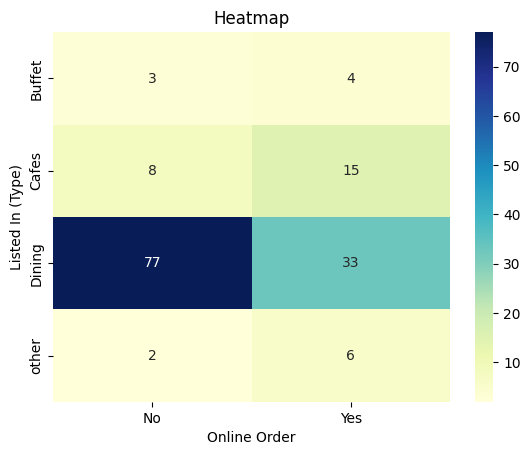

In [36]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()


CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.